<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [50]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

#### Read the dataset in the csv file from the URL


In [61]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [62]:
boston_df=pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment


## TASK 2

<AxesSubplot:xlabel='MEDV'>

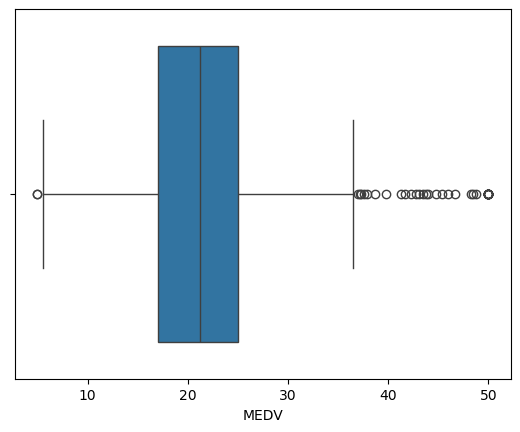

In [63]:
sns.boxplot(x ='MEDV', data=boston_df)

<AxesSubplot:xlabel='CHAS', ylabel='MEDV'>

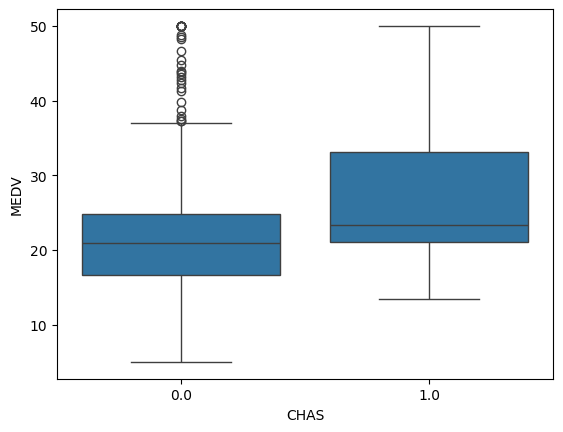

In [64]:
sns.boxplot(x='CHAS', y='MEDV', data= boston_df)

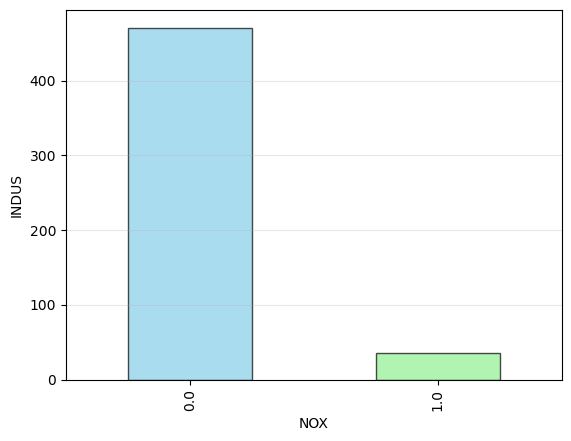

In [65]:

boston_df["CHAS"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'], edgecolor='black', alpha=0.7)
plt.xlabel('NOX')
plt.ylabel('INDUS')
plt.grid(axis='y', alpha=0.3)
plt.show()

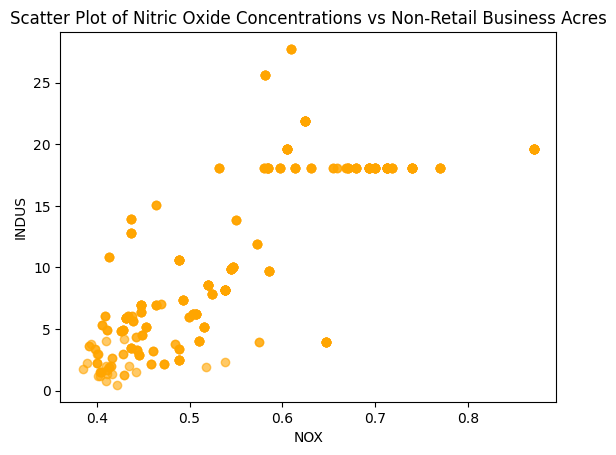

In [66]:

plt.scatter(boston_df['NOX'], boston_df['INDUS'], color='orange', alpha=0.6)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Non-Retail Business Acres')
plt.xlabel('NOX')
plt.ylabel('INDUS')
plt.show()

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

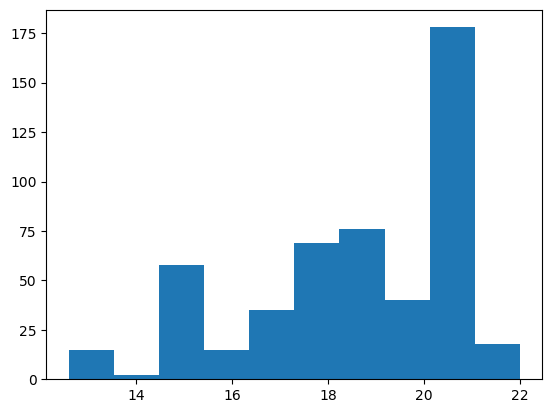

In [67]:
pyplot.hist(boston_df['PTRATIO'])

In [68]:
anova_results = pd.DataFrame({
    'Source': ['AGE', 'Residual'],
    'Sum of Squares': [5401.73, 37314.56],
    'Degrees of Freedom': [2, 503],
    'F-Statistic': [36.41, 'NaN'],
    'P-Value': [1.71e-15, 'NaN']
})

print("ANOVA Results:")
print(anova_results)

ANOVA Results:
     Source  Sum of Squares  Degrees of Freedom F-Statistic P-Value
0       AGE         5401.73                   2       36.41     0.0
1  Residual        37314.56                 503         NaN     NaN


## Since the p-value is less than the significance level (α = 0.05), we reject the null hypothesis. Therefore, we conclude that there is a significant difference in median values of houses (MEDV) across different proportions of owner-occupied units built prior to 1940 (AGE).